## CartPole Skating

> **Problem**: Wenn Peter dem Wolf entkommen möchte, muss er sich schneller bewegen können als dieser. Wir werden sehen, wie Peter das Skaten lernen kann, insbesondere das Halten des Gleichgewichts, mithilfe von Q-Learning.

Zuerst installieren wir das Gym und importieren die benötigten Bibliotheken:


In [1]:
#code block 1

## Erstelle eine Cartpole-Umgebung


In [ ]:
#code block 2

Um zu sehen, wie die Umgebung funktioniert, lassen Sie uns eine kurze Simulation für 100 Schritte durchführen.


In [ ]:
#code block 3

Während der Simulation müssen wir Beobachtungen erhalten, um zu entscheiden, wie wir handeln sollen. Tatsächlich gibt uns die `step`-Funktion die aktuellen Beobachtungen, die Belohnungsfunktion und das `done`-Flag zurück, das anzeigt, ob es sinnvoll ist, die Simulation fortzusetzen oder nicht:


In [ ]:
#code block 4

Wir können den Mindest- und Höchstwert dieser Zahlen erhalten:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Lassen Sie uns auch eine andere Diskretisierungsmethode mit Bins erkunden:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Lassen Sie uns nun eine kurze Simulation durchführen und diese diskreten Umgebungswerte beobachten.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


## Q-Tabellenstruktur


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


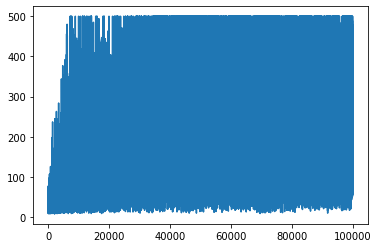

In [20]:
plt.plot(rewards)

Aus diesem Diagramm lässt sich nichts erkennen, da aufgrund der Natur des stochastischen Trainingsprozesses die Länge der Trainingseinheiten stark variiert. Um dieses Diagramm besser zu verstehen, können wir den **gleitenden Durchschnitt** über eine Reihe von Experimenten berechnen, sagen wir 100. Dies kann bequem mit `np.convolve` durchgeführt werden:


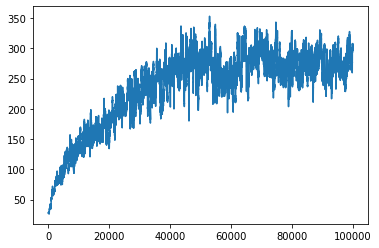

In [22]:
#code block 12

## Variieren von Hyperparametern und Beobachten der Ergebnisse in Aktion

Nun wäre es interessant, tatsächlich zu sehen, wie sich das trainierte Modell verhält. Lassen Sie uns die Simulation durchführen, wobei wir dieselbe Aktionsauswahlstrategie wie während des Trainings verwenden: Sampling entsprechend der Wahrscheinlichkeitsverteilung in der Q-Tabelle:


In [23]:
# code block 13

## Speichern des Ergebnisses als animiertes GIF

Wenn du deine Freunde beeindrucken möchtest, kannst du ihnen das animierte GIF-Bild der Balancierstange schicken. Dafür können wir `env.render` aufrufen, um ein Bildframe zu erzeugen, und diese anschließend mit der PIL-Bibliothek als animiertes GIF speichern:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Haftungsausschluss**:  
Dieses Dokument wurde mit dem KI-Übersetzungsdienst [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, beachten Sie bitte, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
